In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
import joblib

## Error Visible Calculation &  Input Data

In [3]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_cases')
test_labels = test_features.pop('new_cases')
train_dataset.head()

,new_cases,date,popluation,AgeGroup
0,10,265,245353,1
1,0,370,1677000,1
2,182,251,1677000,3
3,190,285,1677000,2
4,2,389,7544000,2


## K-Neighbor Regressor

In [4]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(train_features, train_labels)
s_knr = r2_score(train_labels,knr.predict(train_features))
s_knr_test = r2_score(test_labels,knr.predict(test_features))
print(s_knr,s_knr_test)

0.7302376292421431 0.677313382888882


K-Neighbour Regressor seems good

## N Number Study

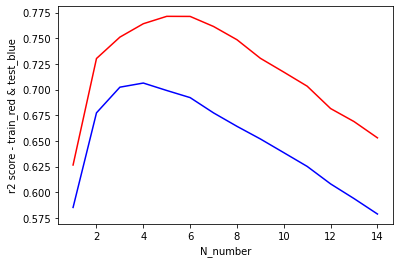

In [5]:
N_number = []
train_pred_score =[]
test_pred_score =[]
for i in range(1,15):
    N_number.append(i)
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_features ,train_labels)
    s_knr_reg = r2_score(train_labels,knr.predict(train_features))
    s_knr_reg_test = r2_score(test_labels,knr.predict(test_features))
    train_pred_score.append(s_knr_reg)
    test_pred_score.append(s_knr_reg_test)
plt.plot(N_number, train_pred_score,'r')
plt.plot(N_number, test_pred_score,'b')
plt.xlabel('N_number')
plt.ylabel('r2 score - train_red & test_blue')
plt.show()

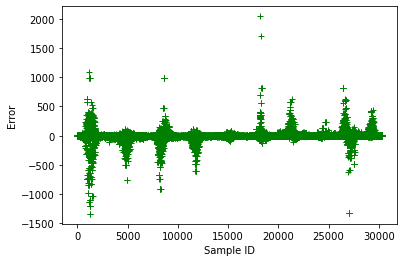

DescribeResult(nobs=30276, minmax=(0.0, 2043.0), mean=25.564052384727177, variance=5945.410036297701, skewness=7.821818543100624, kurtosis=92.4894724742166)

In [6]:
knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(train_features ,train_labels)
test_predict = knr.predict(test_features)
test_labels = test_labels.to_numpy()

error,abserror = errorCalculate(test_labels,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [7]:
r2_score(test_labels,knr.predict(test_features))

0.7063381300779681

In [8]:
filename = 'flu_KNeighborRegressor.sav'
joblib.dump(knr, filename)

['flu_KNeighborRegressor.sav']

DescribeResult(nobs=170144, minmax=(0.0, 3008.8), mean=5.76156314651119, variance=746.3546472712105, skewness=29.928749244945305, kurtosis=1960.7951491136096